In [2]:
import pandas as pd
# Set display options to show all rows
pd.set_option('display.max_rows', None)

In [2]:
math_20_raw= pd.read_csv(r"C:\Ziyuan Sui\MSBA\RA\GARG\school performance data\math-achievement-lea-sy2020-21.csv")
math_18_raw = pd.read_csv(r"C:\Ziyuan Sui\MSBA\RA\GARG\school performance data\math-achievement-lea-sy2018-19.csv")
school_location = pd.read_csv(r"C:\Ziyuan Sui\MSBA\RA\GARG\school performance data\school_info.csv")

C:\Users\jacks\AppData\Local\Temp\ipykernel_74912\2461254621.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  math_18_raw = pd.read_csv(r"C:\Ziyuan Sui\MSBA\RA\GARG\school performance data\math-achievement-lea-sy2018-19.csv")
C:\Users\jacks\AppData\Local\Temp\ipykernel_74912\2461254621.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  school_location = pd.read_csv(r"C:\Ziyuan Sui\MSBA\RA\GARG\school performance data\school_info.csv")


In [3]:
math_20 = math_20_raw[math_20_raw.CATEGORY=='ALL']
math_18 = math_18_raw[math_18_raw.CATEGORY=='ALL']

In [4]:
math_18.head()

,SCHOOL_YEAR,STNAM,FIPST,LEAID,ST_LEAID,LEANM,SUBJECT,GRADE,CATEGORY,DATE_CUR,NUMVALID,PCTPROF
12,2018-2019,ALABAMA,1,100005.0,AL-101,Albertville City,MTH,HS,ALL,13AUG20,317.0,39
16,2018-2019,ALABAMA,1,100005.0,AL-101,Albertville City,MTH,03,ALL,13AUG20,448.0,61
26,2018-2019,ALABAMA,1,100005.0,AL-101,Albertville City,MTH,05,ALL,13AUG20,439.0,41
28,2018-2019,ALABAMA,1,100005.0,AL-101,Albertville City,MTH,04,ALL,13AUG20,447.0,42
33,2018-2019,ALABAMA,1,100005.0,AL-101,Albertville City,MTH,07,ALL,13AUG20,404.0,43


In [5]:
math_20.head()

,SCHOOL_YEAR,STNAM,FIPST,LEAID,ST_LEAID,LEANM,SUBJECT,GRADE,CATEGORY,DATE_CUR,NUMVALID,PCTPROF
0,2020-2021,ALABAMA,1,100005,AL-101,Albertville City,MTH,00,ALL,30MAR22,3020.0,17
16,2020-2021,ALABAMA,1,100005,AL-101,Albertville City,MTH,03,ALL,30MAR22,435.0,28
32,2020-2021,ALABAMA,1,100005,AL-101,Albertville City,MTH,04,ALL,30MAR22,469.0,22
47,2020-2021,ALABAMA,1,100005,AL-101,Albertville City,MTH,05,ALL,30MAR22,434.0,15
63,2020-2021,ALABAMA,1,100005,AL-101,Albertville City,MTH,06,ALL,30MAR22,445.0,16


In [6]:
#make the GRADE value consisitent
math_18['GRADE'] = math_18['GRADE'].replace({'00': '0', '01': '1', '02': '2', '03': '3', '04': '4', '05': '5','06': '6', '07': '7', '08': '8','HS':'9'})
math_20['GRADE'] = math_20['GRADE'].replace({'00': '0', '01': '1', '02': '2', '03': '3', '04': '4', '05': '5','06': '6', '07': '7', '08': '8','HS':'9'})

C:\Users\jacks\AppData\Local\Temp\ipykernel_74912\2664781493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  math_18['GRADE'] = math_18['GRADE'].replace({'00': '0', '01': '1', '02': '2', '03': '3', '04': '4', '05': '5','06': '6', '07': '7', '08': '8','HS':'9'})
C:\Users\jacks\AppData\Local\Temp\ipykernel_74912\2664781493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  math_20['GRADE'] = math_20['GRADE'].replace({'00': '0', '01': '1', '02': '2', '03': '3', '04': '4', '05': '5','06': '6', '07': '7', '

In [7]:
math_18.GRADE.value_counts()

0    17401
6    15473
5    15372
3    15350
4    15340
7    15168
8    15104
9    13155
Name: GRADE, dtype: int64

In [45]:
math_20.GRADE.value_counts()

0    16301
6    14685
5    14603
3    14570
4    14568
8    14442
7    14398
9    12606
Name: GRADE, dtype: int64

In [8]:
print(math_20.shape,math_18.shape)
print(math_20.LEAID.nunique(),math_18.LEAID.nunique())

(116173, 12) (122363, 12)
16301 17401


In [9]:
math_18.dtypes

SCHOOL_YEAR     object
STNAM           object
FIPST           object
LEAID          float64
ST_LEAID        object
LEANM           object
SUBJECT         object
GRADE           object
CATEGORY        object
DATE_CUR        object
NUMVALID       float64
PCTPROF         object
dtype: object

In [18]:
import re
def process_value(value):
    if isinstance(value,str):
        if re.match(r'^\d+$', value):  # Check for integer values
            return value
        elif re.match(r'^\d+-\d+$', value):  # Check for range like '40-44'
            range_values = value.split('-')
            return str((int(range_values[0]) + int(range_values[1])) // 2)
        elif value.startswith('LT'):  # Check for 'LT'
            return int(value[2:])
        elif value.startswith('GT'):  # Check for 'GT'
            return int(value[2:])
        elif value.startswith('GE'):  # Check for 'GE'
            return int(value[2:])
        elif value.startswith('LE'):  # Check for 'LE
            return int(value[2:])
        elif value.startswith('PS'):  # Check for 'PS'
            return 50
        elif value.startswith('.'):  # Check for 'PS'
            return 0
    return None

In [19]:
# Apply the processing function to the 'PCTPROF' column
math_18['PCTPROF'] = math_18['PCTPROF'].apply(process_value)
math_20['PCTPROF'] = math_20['PCTPROF'].apply(process_value)

C:\Users\jacks\AppData\Local\Temp\ipykernel_74912\3397436132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  math_18['PCTPROF'] = math_18['PCTPROF'].apply(process_value)
C:\Users\jacks\AppData\Local\Temp\ipykernel_74912\3397436132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  math_20['PCTPROF'] = math_20['PCTPROF'].apply(process_value)


In [20]:
math_20.dtypes

SCHOOL_YEAR     object
STNAM           object
FIPST            int64
LEAID            int64
ST_LEAID        object
LEANM           object
SUBJECT         object
GRADE           object
CATEGORY        object
DATE_CUR        object
NUMVALID       float64
PCTPROF         object
dtype: object

In [21]:
math_18.LEAID = math_18.LEAID.astype(int)
math_18.GRADE = math_18.GRADE.astype(int)
math_20.GRADE = math_20.GRADE.astype(int)

C:\Users\jacks\AppData\Local\Temp\ipykernel_74912\205711937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  math_18.LEAID = math_18.LEAID.astype(int)
C:\Users\jacks\AppData\Local\Temp\ipykernel_74912\205711937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  math_18.GRADE = math_18.GRADE.astype(int)
C:\Users\jacks\AppData\Local\Temp\ipykernel_74912\205711937.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [23]:
math_20.isna().sum()

SCHOOL_YEAR       0
STNAM             0
FIPST             0
LEAID             0
ST_LEAID          0
LEANM             0
SUBJECT           0
GRADE             0
CATEGORY          0
DATE_CUR          0
NUMVALID       1950
PCTPROF         564
dtype: int64

In [53]:
#deal with missing values
math_18.PCTPROF.fillna(0, inplace=True)
math_20.PCTPROF.fillna(0, inplace=True)

C:\Users\jacks\AppData\Local\Temp\ipykernel_53896\3157190694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  math_18.PCTPROF.fillna(0, inplace=True)
C:\Users\jacks\AppData\Local\Temp\ipykernel_53896\3157190694.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  math_20.PCTPROF.fillna(0, inplace=True)


In [54]:
#change data dtype to integer
math_20.PCTPROF.astype(int)
math_18.PCTPROF.astype(int)

12         39
16         61
26         41
28         42
33         43
76         50
88         46
121        42
133        40
141        34
145        35
157        36
172        47
190        52
193        40
202        39
243        70
267        71
272        73
285        72
292        66
309        69
336        72
351        69
391        70
403        79
405        74
417        78
432        78
444        77
454        77
456        76
476        62
487        27
493        45
496        37
535        47
539        57
566        47
573        42
593        42
598        62
602        37
609        22
618        42
630        42
663        43
664        47
704        73
739        74
765        88
770        70
771        74
775        76
781        85
788        70
830        47
871        32
873        47
879        47
880        42
883        42
895        47
909        43
915        42
922        52
925        42
944        47
967        52
971        57
979        48
996   

In [55]:
merge_table = math_18.merge(math_20,on=['LEAID','GRADE'],how='right',suffixes=('_18','_20'))

In [56]:
#checck the null values
merge_table.isnull().sum()

SCHOOL_YEAR_18    2895
STNAM_18          2895
FIPST_18          2895
LEAID                0
ST_LEAID_18       2895
LEANM_18          2895
SUBJECT_18        2895
GRADE                0
CATEGORY_18       2895
DATE_CUR_18       2895
NUMVALID_18       2952
PCTPROF_18        2895
SCHOOL_YEAR_20       0
STNAM_20             0
FIPST_20             0
ST_LEAID_20          0
LEANM_20             0
SUBJECT_20           0
CATEGORY_20          0
DATE_CUR_20          0
NUMVALID_20       1950
PCTPROF_20           0
dtype: int64

In [57]:
#deal with missing values
merge_table.PCTPROF_18.fillna(0, inplace=True)
merge_table.PCTPROF_20.fillna(0, inplace=True)

In [58]:
#rechecck the null values
merge_table.isnull().sum()

SCHOOL_YEAR_18    2895
STNAM_18          2895
FIPST_18          2895
LEAID                0
ST_LEAID_18       2895
LEANM_18          2895
SUBJECT_18        2895
GRADE                0
CATEGORY_18       2895
DATE_CUR_18       2895
NUMVALID_18       2952
PCTPROF_18           0
SCHOOL_YEAR_20       0
STNAM_20             0
FIPST_20             0
ST_LEAID_20          0
LEANM_20             0
SUBJECT_20           0
CATEGORY_20          0
DATE_CUR_20          0
NUMVALID_20       1950
PCTPROF_20           0
dtype: int64

In [59]:
#recheck data types
merge_table.dtypes

SCHOOL_YEAR_18     object
STNAM_18           object
FIPST_18           object
LEAID               int64
ST_LEAID_18        object
LEANM_18           object
SUBJECT_18         object
GRADE               int32
CATEGORY_18        object
DATE_CUR_18        object
NUMVALID_18       float64
PCTPROF_18         object
SCHOOL_YEAR_20     object
STNAM_20           object
FIPST_20            int64
ST_LEAID_20        object
LEANM_20           object
SUBJECT_20         object
CATEGORY_20        object
DATE_CUR_20        object
NUMVALID_20       float64
PCTPROF_20         object
dtype: object

In [60]:
#change the data type of the column to integer
merge_table.PCTPROF_18 = merge_table.PCTPROF_18.astype(int)
merge_table.PCTPROF_20 = merge_table.PCTPROF_20.astype(int)

In [61]:
merge_table.dtypes

SCHOOL_YEAR_18     object
STNAM_18           object
FIPST_18           object
LEAID               int64
ST_LEAID_18        object
LEANM_18           object
SUBJECT_18         object
GRADE               int32
CATEGORY_18        object
DATE_CUR_18        object
NUMVALID_18       float64
PCTPROF_18          int32
SCHOOL_YEAR_20     object
STNAM_20           object
FIPST_20            int64
ST_LEAID_20        object
LEANM_20           object
SUBJECT_20         object
CATEGORY_20        object
DATE_CUR_20        object
NUMVALID_20       float64
PCTPROF_20          int32
dtype: object

In [62]:
merge_table['diff'] = merge_table.PCTPROF_20-merge_table.PCTPROF_18

In [63]:
merge_table.columns

Index(['SCHOOL_YEAR_18', 'STNAM_18', 'FIPST_18', 'LEAID', 'ST_LEAID_18',
       'LEANM_18', 'SUBJECT_18', 'GRADE', 'CATEGORY_18', 'DATE_CUR_18',
       'NUMVALID_18', 'PCTPROF_18', 'SCHOOL_YEAR_20', 'STNAM_20', 'FIPST_20',
       'ST_LEAID_20', 'LEANM_20', 'SUBJECT_20', 'CATEGORY_20', 'DATE_CUR_20',
       'NUMVALID_20', 'PCTPROF_20', 'diff'],
      dtype='object')

In [64]:
merge_table.to_csv(r"C:\Ziyuan Sui\MSBA\RA\GARG\school performance data\performance_merge.csv")

Check result

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
merge_table = pd.read_csv(r"C:\Ziyuan Sui\MSBA\RA\GARG\school performance data\performance_merge.csv")

In [2]:
merge_table.head()

,Unnamed: 0,SCHOOL_YEAR_18,STNAM_18,FIPST_18,LEAID,ST_LEAID_18,LEANM_18,SUBJECT_18,GRADE,CATEGORY_18,...,STNAM_20,FIPST_20,ST_LEAID_20,LEANM_20,SUBJECT_20,CATEGORY_20,DATE_CUR_20,NUMVALID_20,PCTPROF_20,diff
0,0,2018-2019,ALABAMA,1.0,100005,AL-101,Albertville City,MTH,0,ALL,...,ALABAMA,1,AL-101,Albertville City,MTH,ALL,30MAR22,3020.0,17,-29
1,1,2018-2019,ALABAMA,1.0,100005,AL-101,Albertville City,MTH,3,ALL,...,ALABAMA,1,AL-101,Albertville City,MTH,ALL,30MAR22,435.0,28,-33
2,2,2018-2019,ALABAMA,1.0,100005,AL-101,Albertville City,MTH,4,ALL,...,ALABAMA,1,AL-101,Albertville City,MTH,ALL,30MAR22,469.0,22,-20
3,3,2018-2019,ALABAMA,1.0,100005,AL-101,Albertville City,MTH,5,ALL,...,ALABAMA,1,AL-101,Albertville City,MTH,ALL,30MAR22,434.0,15,-26
4,4,2018-2019,ALABAMA,1.0,100005,AL-101,Albertville City,MTH,6,ALL,...,ALABAMA,1,AL-101,Albertville City,MTH,ALL,30MAR22,445.0,16,-26


In [11]:
merge_table.shape

(116173, 24)

In [17]:
merge_table.describe()

,Unnamed: 0,FIPST_18,LEAID,GRADE,NUMVALID_18,PCTPROF_18,FIPST_20,NUMVALID_20,PCTPROF_20,diff
count,116173.000000,113278.000000,1.161730e+05,116173.000000,113221.000000,116173.000000,116173.000000,114223.000000,116173.000000,116173.000000
mean,58086.000000,28.970692,2.908463e+06,5.103449,440.449934,43.878345,28.960283,335.437119,37.314514,-6.563832
std,33536.400749,14.553530,1.460041e+06,2.757081,2336.323439,20.523329,14.584786,1694.950281,20.151650,17.381890
min,0.000000,1.000000,1.000050e+05,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-92.000000
25%,29043.000000,18.000000,1.800178e+06,3.000000,37.000000,30.000000,18.000000,29.000000,21.000000,-15.000000
50%,58086.000000,29.000000,2.926070e+06,5.000000,94.000000,47.000000,29.000000,78.000000,37.000000,-6.000000
75%,87129.000000,40.000000,4.012180e+06,7.000000,272.000000,57.000000,40.000000,216.000000,50.000000,0.000000
max,116172.000000,59.000000,5.900200e+06,9.000000,252483.000000,99.000000,59.000000,177518.000000,99.000000,95.000000


(array([1.4000e+01, 5.5000e+01, 1.2000e+02, 2.7400e+02, 1.3540e+03,
        2.5560e+03, 7.1290e+03, 1.5111e+04, 2.8801e+04, 3.8998e+04,
        1.0335e+04, 5.0880e+03, 1.2700e+03, 2.2670e+03, 8.7400e+02,
        1.6300e+03, 1.7700e+02, 8.7000e+01, 1.8000e+01, 1.5000e+01]),
 array([-92.  , -82.65, -73.3 , -63.95, -54.6 , -45.25, -35.9 , -26.55,
        -17.2 ,  -7.85,   1.5 ,  10.85,  20.2 ,  29.55,  38.9 ,  48.25,
         57.6 ,  66.95,  76.3 ,  85.65,  95.  ]),
 <BarContainer object of 20 artists>)

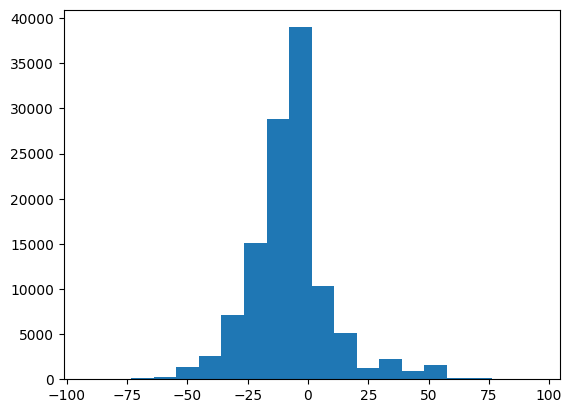

In [12]:
plt.hist(merge_table['diff'], bins=20)

Connect with web data using website column

In [8]:
web_data = pd.read_csv(r"C:\Ziyuan Sui\MSBA\RA\GARG\data\final_df3.csv")

In [9]:
web_data.head()

,udemy,edx,linkedin learning,skillshare,moodle,udacity,ispring suite,thinkific labs,khan acadmey,thinkific,...,brainly,quizlet,coursehero,google,youtube,school,total,index,domain,html_file
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1800earlyon.org27895.html,2.0,27895,1800earlyon.org,27895.html
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2bvikings.blogspot.com130434.html,1.0,130434,2bvikings.blogspot.com,130434.html
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,ab.thinkingdistance.org33532.html,1.0,33532,ab.thinkingdistance.org,33532.html
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,accountability.aurorak12.org966.html,1.0,966,accountability.aurorak12.org,966.html
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,accounts.google.com100465.html,4.0,100465,accounts.google.com,100465.html
